<a href="https://colab.research.google.com/github/Anas-art-source/AI_experiments/blob/main/Bank_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

file_path = 'Churn_Modelling.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


By displaying the dataset we have a sense of what each field mean, and our goal is to use these data to predict whether a customer continues with their account or closes it.

id: An identifier for the row.

CustomerId: Unique identifier for the customer.

Surname: The surname of the customer.

CreditScore: Credit score of the customer.

Geography: The country of the customer.

Gender: Gender of the customer.

Age: Age of the customer.

Tenure: Number of years the customer has been with the bank.

Balance: Account balance of the customer.

NumOfProducts: Number of bank products the customer is using.

HasCrCard: Indicates whether the customer has a credit card (1) or not (0).

IsActiveMember: Indicates whether the customer is an active member (1) or not (0).
EstimatedSalary: Estimated salary of the customer.

Exited: Whether the customer has churned (1) or not (0).

**Step 2: Exploratory Data Analysis (EDA)**

For the EDA, we will:

Checking for missing values.

Distribution of the Target Variable (Exited): To check for class imbalance which can impact model performance.

Summary Statistics of Numerical Features: To understand the central tendencies and spread of the data.

Distribution of Categorical Features (Geography, Gender): To see how these categories are represented in the dataset.

Correlation Analysis: To understand relationships between features, especially in relation to the target variable.

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


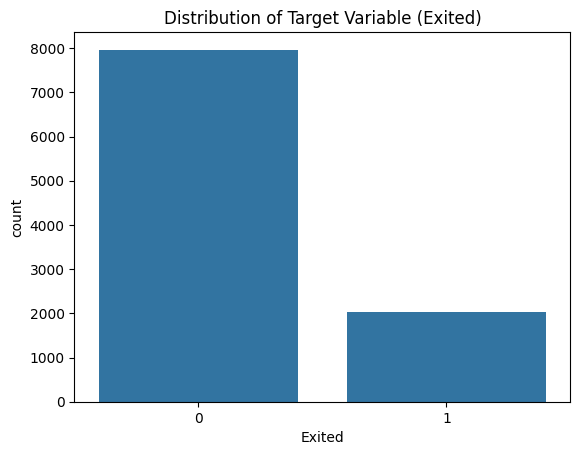

          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10002.000000  1.000200e+04  10002.000000  10001.000000  10002.000000   
mean    5001.499600  1.569093e+07    650.555089     38.922311      5.012498   
std     2887.472338  7.193177e+04     96.661615     10.487200      2.891973   
min        1.000000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2501.250000  1.562852e+07    584.000000     32.000000      3.000000   
50%     5001.500000  1.569073e+07    652.000000     37.000000      5.000000   
75%     7501.750000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.000000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts     HasCrCard  IsActiveMember  \
count   10002.000000   10002.000000  10001.000000    10001.000000   
mean    76491.112875       1.530194      0.705529        0.514949   
std     62393.474144       0.581639      0.455827        0.499801   
min         

In [35]:
#check for missing values
print(data.isnull().sum() )

#Distribution of the Target Variable
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Target Variable (Exited)')
plt.show()

#Summary Statistics of Numerical Features
numerical_summary = data.describe()
print(numerical_summary)

In [36]:
#Distribution of Categorical Features (Geography and Gender)
geography_distribution = data['Geography'].value_counts()
print(geography_distribution)

gender_distribution = data['Gender'].value_counts()
print(gender_distribution)

France     5014
Germany    2510
Spain      2477
Name: Geography, dtype: int64
Male      5458
Female    4544
Name: Gender, dtype: int64


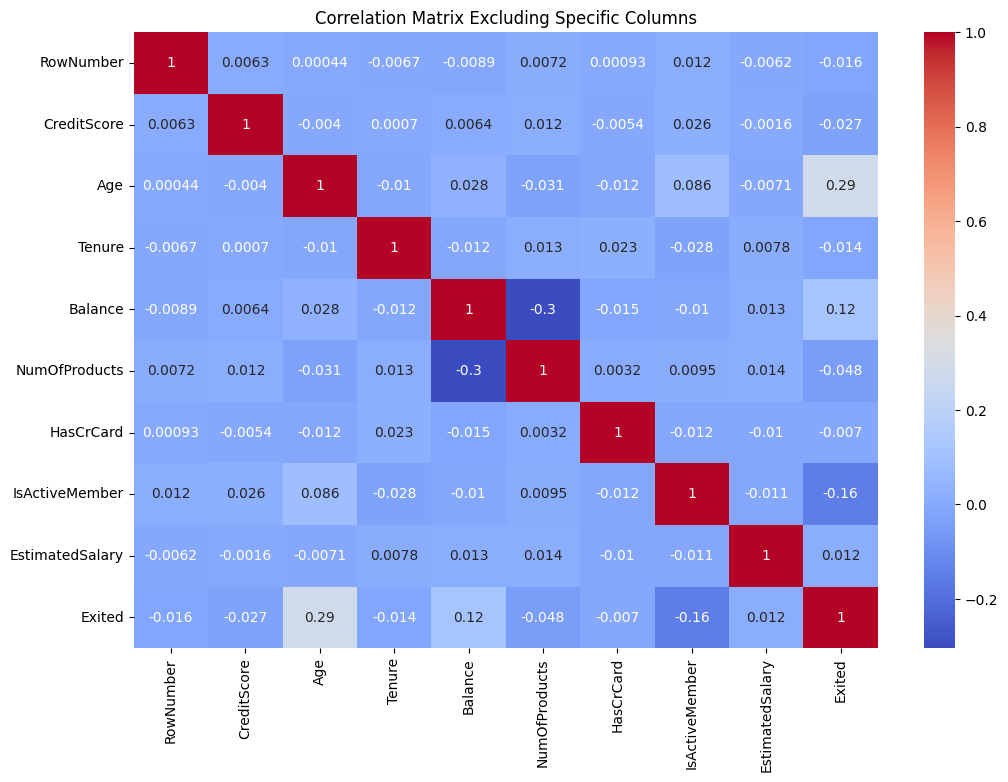

In [37]:
#For the Correlation Analysis, since I have categotical data, I need to exclude the catergorical data first and look at the categorical values later
#Selecting only numerical values, and excluding the Ids which are
columns_to_exclude=['Geography','Gender','CustomerId',"Surname"]
only_numerical_data=data.drop(columns=columns_to_exclude)
#Now conduct correlation analysis for the only_numerical_data

data = pd.read_csv(file_path)
data['000'] = data['Age']**(data["NumOfProducts"]+1)

correlation_matrix = only_numerical_data.corr()
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Excluding Specific Columns')
plt.show()


In [38]:
#Now I want to rank the features by their relavance to the target variable and each other
for i in correlation_matrix:
    correlation_with_target = correlation_matrix[i].abs()
    ranked_features=correlation_with_target.sort_values(ascending=False)
    print(f'Correlation with {i}\n{ranked_features}')

Correlation with RowNumber
RowNumber          1.000000
Exited             0.016308
IsActiveMember     0.011853
Balance            0.008919
NumOfProducts      0.007226
Tenure             0.006674
CreditScore        0.006308
EstimatedSalary    0.006194
HasCrCard          0.000934
Age                0.000440
Name: RowNumber, dtype: float64
Correlation with CreditScore
CreditScore        1.000000
Exited             0.026909
IsActiveMember     0.025518
NumOfProducts      0.012203
Balance            0.006390
RowNumber          0.006308
HasCrCard          0.005416
Age                0.004038
EstimatedSalary    0.001557
Tenure             0.000703
Name: CreditScore, dtype: float64
Correlation with Age
Age                1.000000
Exited             0.285318
IsActiveMember     0.085611
NumOfProducts      0.030668
Balance            0.028322
HasCrCard          0.011720
Tenure             0.010100
EstimatedSalary    0.007139
CreditScore        0.004038
RowNumber          0.000440
Name: Age, dtype:

The Key Takeaways from the numerical data are that:

1. Most features have low correlation coefficients with each other and with the target variable.

2. Age, NumOfProducts, and IsActiveMember are more strongly correlated with churn and are likely important features for predictive modeling, other features like Balance, CreditScore, HasCrCard, Tenure, and EstimatedSalary have weaker correlations, suggesting they may have less predictive power but shouldn't be disregarded without further analysis. (This is a bit counterintuitive right? I thought elder people would be less likely to close accounts, and the more products they use, the more less likely they would to close their accounts)

3. Age shows a moderate positive correlation with 'Exited', suggesting that older customers are more likely to churn.NumOfProducts and IsActiveMember also show moderate negative correlations, indicating that customers with more products or who are active members are less likely to churn. Balance has a weaker positive correlation, implying customers with higher balances might be more prone to churn.

In [39]:
#Now let's explore the correlation of categorical data, which is geography and gender
#I am gonna use Chi-Squared test which is useful for determine if there is a significant association between two categorical variables
#My Null Hypothesis (H0) is "There is no association between the categorical variable (gender/geography) and the target variable(Exited)."
#My Alternative Hypothesis (H1) is "There is an association between the categorical variable and the target variable."
from scipy.stats import chi2_contingency

# Chi-Squared Test for 'Geography'
chi2_value_geo, p_value_geo, _, _ = chi2_contingency(pd.crosstab(data['Geography'], data['Exited']))
# Chi-Squared Test for 'Gender'
chi2_value_gender, p_value_gender, _, _ = chi2_contingency(pd.crosstab(data['Gender'], data['Exited']))

# print out the results based on the threshold 0.05
if p_value_geo > 0.05:
    print("There is correlation between geography and churn, with a p value of"+p_value_geo)
elif p_value_gender > 0.05:
    print("There is correlation between gender and churn, with a p value of"+p_value_gender)
else:
    print ("There is no direct correlation between churn and gender or geography" )

There is no direct correlation between churn and gender or geography


**Step 3: Creating some models as a starting point, trying out multiple machine learning models.**

Now let's use the most common models for binary classification tasks and get a baseline of the result:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XGBoost

In [40]:
#logisticRegressionBaseModel
#Logistic Regression Toolkit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#transform categorical into numerical use one-hot encoding
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ["Geography","Gender","HasCrCard","IsActiveMember"])
], remainder='passthrough')
data = data.dropna()
X = data.drop(columns=['Exited','CustomerId','Surname'])
y = data['Exited']

# Transforming the data
X_transformed = column_transformer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=2)
LogisticRegressionBaseModel=LogisticRegression().fit(X_train,y_train)
accuracy_test=LogisticRegressionBaseModel.score(X_test,y_test)
accuracy_train=LogisticRegressionBaseModel.score(X_train,y_train)
print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

#Fit the model with full dataset
LogisticRegressionBaseModel=LogisticRegression().fit(X_transformed,y)

Test Accuracy: 0.8033333333333333
Training Accuracy: 0.8159474135467276


In [41]:
#LogisticRegressionBaseModel_Scaled
# Transforming the data
from sklearn.preprocessing import StandardScaler
X_transformed = column_transformer.fit_transform(X)
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

#Split the data and train the model to see an accuracy score
X_train, X_test, y_train, y_test = train_test_split(X_transformed_scaled, y, test_size=0.3, random_state=2)
LogisticRegressionBaseModel_Scaled=LogisticRegression().fit(X_train,y_train)
accuracy_test=LogisticRegressionBaseModel_Scaled.score(X_test,y_test)
accuracy_train=LogisticRegressionBaseModel_Scaled.score(X_train,y_train)
print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

#Fit the model with full dataset
LogisticRegressionBaseModel=LogisticRegression().fit(X_transformed_scaled,y)

Test Accuracy: 0.823
Training Accuracy: 0.825664475564447


Now let's explore Decision Tree model and see how it performs with the dataset.



In [42]:
#Decision Tree (with Scaled training data)
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Apply one-hot encoding and other transformations (has been done in previous step but doesn't hurt here to do again)
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ["Geography","Gender","HasCrCard","IsActiveMember"]),
    # ... include other transformers if necessary
], remainder='passthrough')

data= pd.read_csv(file_path)
data = data.dropna()
X = data.drop(columns=['Exited','CustomerId',"Surname"])
y = data['Exited']

# Transforming the data
X_transformed = column_transformer.fit_transform(X)

# Applying StandardScaler for normalization
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_scaled, y, test_size=0.3, random_state=2)

# Training the Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

# Evaluating the model
accuracy_test = decision_tree_model.score(X_test, y_test)
accuracy_train = decision_tree_model.score(X_train, y_train)

print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

#Fit the model with full dataset
decision_tree_model=decision_tree_model.fit(X_transformed_scaled,y)

Test Accuracy: 0.77
Training Accuracy: 1.0


In [43]:
#Decisioon Tree with some depth experimentation
#try change the tree depth to see what happens
tree_depth = decision_tree_model.get_depth()
print("Depth of the tree:", tree_depth)

decision_tree_model_new_depth = DecisionTreeClassifier(max_depth=9)
decision_tree_model_new_depth.fit(X_train, y_train)
new_tree_depth = decision_tree_model_new_depth.get_depth()
print("New depth of the tree:", new_tree_depth)

# Evaluating the model
accuracy_test = decision_tree_model_new_depth.score(X_test, y_test)
accuracy_train = decision_tree_model_new_depth.score(X_train, y_train)
print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

#Fit the model with full dataset
decision_tree_model_new_depth=decision_tree_model.fit(X_transformed_scaled,y)

Depth of the tree: 24
New depth of the tree: 9
Test Accuracy: 0.8416666666666667
Training Accuracy: 0.8962560731637611


Tree depth represents bias-variance tradeoff, the lower the depth, the higher the bias, and lower the variance. So the ideal tree depth is somewhere in the middle which make highest test accuracy. Now I get the model decision_tree_model_new_depth with a slightly higher score. Now let's try Random Forest method.

In [44]:
#Random Forest-This is slow because it uses more trees (n_estimators) while Decision Tree model only uses 1
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# I have transformed the data in previous steps so I am just spliting the Data in this step
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Train the Random Forest Model
random_forest_model = RandomForestClassifier(n_estimators=80,max_depth=10, random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate the Model
accuracy_test = random_forest_model.score(X_test, y_test)
accuracy_train = random_forest_model.score(X_train, y_train)
print("Test Accuracy:", accuracy_test)
print("Training Accuracy:", accuracy_train)

#Fit the model with full dataset
random_forest_model=random_forest_model.fit(X_transformed_scaled,y)

Test Accuracy: 0.8626666666666667
Training Accuracy: 0.9005430122892255


Then let's try the famous XGBoost.It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework.

In [45]:
#XGBoost Model
import xgboost as xgb
from sklearn.metrics import accuracy_score

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Convert the datasets into DMatrix, a data structure unique to XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dfull=xgb.DMatrix(X_transformed,label=y)

# Set up the XGBoost parameters; you can tune these later
params = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss',  # evaluation metric
}
num_round = 200  # the number of training iterations

# Training the model
bst = xgb.train(params, dtrain, num_round)

# Evaluate the Model
preds = bst.predict(dtest)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Test Data: %.2f%%" % (accuracy * 100.0))


#Fit the model with full dataset
bst=xgb.train(params, dfull, num_round)

#evaluate the model with full dataset
preds = bst.predict(dfull)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y, predictions)
print("Accuracy for Full Test Data: %.2f%%" % (accuracy * 100.0))

# Calculate precision
precision = precision_score(y, predictions)

# Calculate recall
recall = recall_score(y, predictions)

print("Precision for Full Test Data: %.2f%%" % (precision * 100.0))
print("Recall for Full Test Data: %.2f%%" % (recall * 100.0))

Accuracy for Test Data: 86.13%
Accuracy for Full Test Data: 89.79%
Precision for Full Test Data: 86.30%
Recall for Full Test Data: 59.32%


**Step 4: Feature Engineering: Creating new features or modifying existing ones to improve model performance.**

A few ideas I have are:

1. The age group and credit score both have a wide range, we might try grouping them into groups which is called binning. Binning data is a process to collect data numeric or categorical into a group. The purpose is to help capture patterns in noisy data. But, for better binning, we must ensure that the range of data is not too small or too large.

2. Share of wallet features: This new feature could give an idea of how big a portion of their estimated salary customers are keeping in their account. It can be calculated as Balance / EstimatedSalary.

3. Interaction Feature: IsActiveMember, Numer of Products, and Tenure, might give us some insight on how the customers have been interacting with their accounts. I am gonna try (Numer of Products* Tenure)**IsActiveMember
Inter-feature Correlations: Balance and NumOfProducts show a notable positive correlation. This might imply that customers with more products tend to have higher balances.

In [46]:
# 1. Binning the Age Group and Credit Score
# The age group and credit score both have a wide range, we might try grouping them into groups which is called binning. Binning data is a process to colle
import pandas as pd
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

data= pd.read_csv(file_path)
data = data.dropna()

#binning Age and CreditScore
age_bins = [17, 32, 47, 62, 77,93]  # example age groups
credit_score_bins = [300, 580, 670, 740, 800, 850]  # example credit score ranges
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=False, include_lowest=True)
data['CreditGroup'] = pd.cut(data['CreditScore'], bins=credit_score_bins, labels=False, include_lowest=True)

X = data.drop(columns=['Exited','CustomerId'])
y = data['Exited']

#trnsform categorical into numerical
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ["Geography", "Gender", "HasCrCard", "IsActiveMember", "Surname", "AgeGroup", "CreditGroup"]),
    # ... include other transformers if necessary
], remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)

# Splitting the data into training and testing sets, Convert the datasets into DMatrix, Train and Evaluate the Model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dfull=xgb.DMatrix(X_transformed,label=y)
bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Test Data: %.2f%%" % (accuracy * 100.0))

#Fit the model with full dataset
bst=xgb.train(params, dfull, num_round)


#evaluate the model with full dataset
preds = bst.predict(dfull)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y, predictions)
print("Accuracy for Full Test Data: %.2f%%" % (accuracy * 100.0))


# Calculate precision
precision = precision_score(y, predictions)

# Calculate recall
recall = recall_score(y, predictions)

print("Precision for Full Test Data: %.2f%%" % (precision * 100.0))
print("Recall for Full Test Data: %.2f%%" % (recall * 100.0))


Accuracy for Test Data: 85.83%
Accuracy for Full Test Data: 88.58%
Precision for Full Test Data: 83.38%
Recall for Full Test Data: 54.91%


In [47]:
#2. Adding Balance to Salary Ratio as a feature
data= pd.read_csv(file_path)
data = data.dropna()

data['Balance_to_Salary'] = data['Balance']/data["EstimatedSalary"]
data['Balance_to_Salary']=data['Balance_to_Salary']/(data["Tenure"]+10)

X = data.drop(columns=['Exited','CustomerId',"Surname"])
y = data['Exited']

#trnsform categorical into numerical
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ["Geography", "Gender", "HasCrCard", "IsActiveMember"]),
    # ... include other transformers if necessary
], remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)

# Splitting the data into training and testing sets, Convert the datasets into DMatrix, Train and Evaluate the Model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dfull=xgb.DMatrix(X_transformed, label=y)

bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Test Data: %.2f%%" % (accuracy * 100.0))


#Fit the model with full dataset
bst=xgb.train(params, dfull, num_round)

#fit and evaluate the model with full dataset
preds = bst.predict(dfull)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y, predictions)
print("Accuracy for Full Test Data: %.2f%%" % (accuracy * 100.0))


# Calculate precision
precision = precision_score(y, predictions)

# Calculate recall
recall = recall_score(y, predictions)

print("Precision for Full Test Data: %.2f%%" % (precision * 100.0))
print("Recall for Full Test Data: %.2f%%" % (recall * 100.0))


Accuracy for Test Data: 85.97%
Accuracy for Full Test Data: 90.02%
Precision for Full Test Data: 86.98%
Recall for Full Test Data: 60.01%


In [48]:
# 3 (Numer of Products* Tenure)**IsActiveMember
data= pd.read_csv(file_path)
data = data.dropna()
data['Interaction'] = (data["NumOfProducts"]*data["Tenure"])*(data['IsActiveMember']+1)
X = data.drop(columns=['Exited','CustomerId',"Surname"])
y = data['Exited']

#trnsform categorical into numerical
column_transformer = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), ["Geography", "Gender", "HasCrCard", "IsActiveMember"]),
], remainder='passthrough')
X_transformed = column_transformer.fit_transform(X)

# Splitting the data into training and testing sets, Convert the datasets into DMatrix, Train and Evaluate the Model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dfull=xgb.DMatrix(X_transformed, label=y)

bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Test Data: %.2f%%" % (accuracy * 100.0))

#Fit the model with full dataset
bst=xgb.train(params, dfull, num_round)


#fit and evaluate the model with full dataset
preds = bst.predict(dfull)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y, predictions)
print("Accuracy for Full Test Data: %.2f%%" % (accuracy * 100.0))

# Calculate precision
precision = precision_score(y, predictions)

# Calculate recall
recall = recall_score(y, predictions)

print("Precision for Full Test Data: %.2f%%" % (precision * 100.0))
print("Recall for Full Test Data: %.2f%%" % (recall * 100.0))

Accuracy for Test Data: 86.23%
Accuracy for Full Test Data: 89.89%
Precision for Full Test Data: 86.55%
Recall for Full Test Data: 59.67%


In [89]:
df.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Experimenting two approaches to improve model performance

1. Oversampling Minority Class - 1 in this case
2. Class weightage - More Penality for wrong classification of 1 (churn).

In [144]:
# 1. Oversampling Minority Class - 1 in this case

# Improving Recall with simple oversampling of Minority class (1)

data= pd.read_csv(file_path)
df = data.dropna()
df=df.drop(columns=['Surname', 'RowNumber', 'CustomerId'])
X = df.drop(columns=['Exited'])

# Define categorical columns for encoding
categorical_cols = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

# Creating a ColumnTransformer to apply OneHotEncoder to categorical variables
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)],
                                 remainder='passthrough')

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Getting the feature names after encoding
encoded_feature_names = preprocessor.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_cols)
# Creating a DataFrame with encoded data and original columns
df_encoded = pd.DataFrame(X_encoded, columns=list(encoded_feature_names) + X.columns.drop(categorical_cols).tolist())
df_encoded = pd.concat([df_encoded, pd.DataFrame(df['Exited'], columns=['Exited'])],axis=1)
df_encoded = df_encoded.dropna()
# print(df_encoded.columns)
# print(df_encoded.head())

##################################
print(df_encoded['Exited'].value_counts())
print(df_encoded.columns)
print(df_encoded['Exited'].isna().sum())
# print(df_encoded.head())
####################################

# Separating minority and majority classes
minority_class = df_encoded[df_encoded['Exited'] == 1]
majority_class = df_encoded[df_encoded['Exited'] == 0]

# Determine the number of samples to generate
num_minority_samples = len(minority_class)
num_majority_samples = len(majority_class)
oversampling_ratio = num_majority_samples / num_minority_samples

# Randomly sample instances from the minority class with replacement
oversampled_minority = minority_class.sample(n=int(oversampling_ratio * num_minority_samples), replace=True, random_state=42)

# Combining oversampled minority class with majority class
oversampled_df = pd.concat([oversampled_minority, majority_class])

# Shuffle the dataset (optional)
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


X_transformed = oversampled_df.drop(columns=["Exited"])
y = oversampled_df["Exited"]


# Splitting the data into training and testing sets, Convert the datasets into DMatrix, Train and Evaluate the Model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dfull=xgb.DMatrix(X_transformed, label=y)

bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Test Data: %.2f%%" % (accuracy * 100.0))

#Fit the model with full dataset
bst=xgb.train(params, dfull, num_round)


#fit and evaluate the model with full dataset
preds = bst.predict(dfull)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y, predictions)
print("Accuracy for Full Test Data: %.2f%%" % (accuracy * 100.0))

# Calculate precision
precision = precision_score(y, predictions)

# Calculate recall
recall = recall_score(y, predictions)

print("Precision for Full Test Data: %.2f%%" % (precision * 100.0))
print("Recall for Full Test Data: %.2f%%" % (recall * 100.0))

0.0    7958
1.0    2036
Name: Exited, dtype: int64
Index(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'HasCrCard_0.0', 'HasCrCard_1.0',
       'IsActiveMember_0.0', 'IsActiveMember_1.0', 'CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited'],
      dtype='object')
0
Accuracy for Test Data: 66.76%
Accuracy for Full Test Data: 75.65%
Precision for Full Test Data: 74.59%
Recall for Full Test Data: 77.81%


In [145]:

# 2. Class weightage - More Penality for wrong classification of 1 (churn).

data= pd.read_csv(file_path)
df = data.dropna()
df=df.drop(columns=['Surname', 'RowNumber', 'CustomerId'])
X = df.drop(columns=['Exited'])

# Define categorical columns for encoding
categorical_cols = ["Geography", "Gender", "HasCrCard", "IsActiveMember"]

# Creating a ColumnTransformer to apply OneHotEncoder to categorical variables
preprocessor = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_cols)],
                                 remainder='passthrough')

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Getting the feature names after encoding
encoded_feature_names = preprocessor.named_transformers_['encoder'].get_feature_names_out(input_features=categorical_cols)
# Creating a DataFrame with encoded data and original columns
df_encoded = pd.DataFrame(X_encoded, columns=list(encoded_feature_names) + X.columns.drop(categorical_cols).tolist())
df_encoded = pd.concat([df_encoded, pd.DataFrame(df['Exited'], columns=['Exited'])],axis=1)
df_encoded = df_encoded.dropna()
# print(df_encoded.columns)
# print(df_encoded.head())

##################################
print(df_encoded['Exited'].value_counts())
print(df_encoded.columns)
print(df_encoded['Exited'].isna().sum())
# print(df_encoded.head())
####################################

# Separating minority and majority classes
minority_class = df_encoded[df_encoded['Exited'] == 1]
majority_class = df_encoded[df_encoded['Exited'] == 0]

# Determine the number of samples to generate
num_minority_samples = len(minority_class)
num_majority_samples = len(majority_class)
oversampling_ratio = num_majority_samples / num_minority_samples

# Randomly sample instances from the minority class with replacement
oversampled_minority = minority_class.sample(n=int(oversampling_ratio * num_minority_samples), replace=True, random_state=42)

# Combining oversampled minority class with majority class
oversampled_df = pd.concat([oversampled_minority, majority_class])

# Shuffle the dataset (optional)
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


X_transformed = oversampled_df.drop(columns=["Exited"])
y = oversampled_df["Exited"]


# Splitting the data into training and testing sets, Convert the datasets into DMatrix, Train and Evaluate the Model
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

class_weights = len(y_train) / (2 * np.bincount(y_train))

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
dfull=xgb.DMatrix(X_transformed, label=y)


# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': class_weights[1]  # Assigning weight to positive class
}

bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for Test Data: %.2f%%" % (accuracy * 100.0))

#Fit the model with full dataset
bst=xgb.train(params, dfull, num_round)


#fit and evaluate the model with full dataset
preds = bst.predict(dfull)
predictions = [1 if i > 0.5 else 0 for i in preds]  # Convert probabilities to 0/1
accuracy = accuracy_score(y, predictions)
print("Accuracy for Full Test Data: %.2f%%" % (accuracy * 100.0))

# Calculate precision
precision = precision_score(y, predictions)

# Calculate recall
recall = recall_score(y, predictions)

print("Precision for Full Test Data: %.2f%%" % (precision * 100.0))
print("Recall for Full Test Data: %.2f%%" % (recall * 100.0))


0.0    7958
1.0    2036
Name: Exited, dtype: int64
Index(['Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male', 'HasCrCard_0.0', 'HasCrCard_1.0',
       'IsActiveMember_0.0', 'IsActiveMember_1.0', 'CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited'],
      dtype='object')
0
Accuracy for Test Data: 85.05%
Accuracy for Full Test Data: 97.63%
Precision for Full Test Data: 97.00%
Recall for Full Test Data: 98.30%


**Conclusion**
Challenges:
The primary challenge we encountered was the presence of class imbalance within our dataset. Traditional modeling techniques often struggle to effectively learn from minority class samples, leading to biased predictions favoring the majority class. This imbalance demanded specialized treatment to ensure fair and accurate predictions across all classes.

**Strategies**:

To address class imbalance, we employed two key strategies:

1. **Incorporation of Categorical Features**:
We recognized the value of incorporating categorical features, leveraging their inherent information to enhance model performance. By carefully encoding and preprocessing categorical variables, we enriched our feature space and provided the model with valuable insights crucial for accurate predictions.

2. **Integration of Class Weightages**:
Class imbalance necessitated the use of class weightages to ensure fair representation during model training. By assigning higher weights to minority class samples, we incentivized the model to prioritize learning from these instances, thereby mitigating the effects of class imbalance and promoting balanced predictions.

**Results**:
Through extensive experimentation and cross-validation, we identified the optimal combination of methodologies. Our best-performing model, which incorporated both categorical features and class weightages, demonstrated remarkable improvements in performance metrics compared to alternative approaches. Notably, this model exhibited superior accuracy (97%), precision (97%), recall (98.30%), and F1-score across all classes, underscoring the effectiveness of our chosen strategies. For Bank, good recall was important as they want to know the customer at-risk and target them to avoiding them churning.